## 0. Mecab 다운받기

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:12 https://developer.downl

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Rea

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   461k      0  0:00:02  0:00:02 --:--:--  962k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [ ]:
%%bash
python3 -c "import jpype; jpype.startJVM(convertStrings=True); print(jpype.isJVMStarted())"

True


In [ ]:
%%bash
pip3 install pytest
TEST_DIR=$(mktemp -d -t test-XXXXXXXXXX)
git clone https://github.com/konlpy/konlpy --depth=1 $TEST_DIR
python3 -m pytest -v $TEST_DIR

============================= test session starts ==============================
platform linux -- Python 3.6.9, pytest-3.6.4, py-1.9.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: ../tmp/test-AqJhZsQOok/.pytest_cache
rootdir: /tmp/test-AqJhZsQOok, inifile:
plugins: typeguard-2.7.1
collecting ... collected 37 items

../tmp/test-AqJhZsQOok/test/test_corpus.py::test_corpus_kolaw PASSED     [  2%]
../tmp/test-AqJhZsQOok/test/test_hannanum.py::test_hannanum_analyze PASSED [  5%]
../tmp/test-AqJhZsQOok/test/test_hannanum.py::test_hannanum_nouns PASSED [  8%]
../tmp/test-AqJhZsQOok/test/test_hannanum.py::test_hannanum_morphs PASSED [ 10%]
../tmp/test-AqJhZsQOok/test/test_hannanum.py::test_hannanum_pos_9 PASSED [ 13%]
../tmp/test-AqJhZsQOok/test/test_hannanum.py::test_hannanum_pos_22 PASSED [ 16%]
../tmp/test-AqJhZsQOok/test/test_hannanum.py::test_hannanum_pos_join PASSED [ 18%]
../tmp/test-AqJhZsQOok/test/test_hannanum.py::test_hannanum_typechecking FAILED [ 21%]
../tmp/test-AqJhZsQOok/test/t

Cloning into '/tmp/test-AqJhZsQOok'...


In [ ]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
kkma = Kkma()
komoran = Komoran()
hannanum = Hannanum()
okt = Okt()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))
pprint(komoran.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))
pprint(hannanum.pos(u'오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^'))
pprint(okt.phrases(u'구글은 멋져요. 깃허브도 멋져요. KoNLPy도 멋져요!'))

['네, 안녕하세요.', '반갑습니다.']
['질문', '건의', '사항', '이슈']
[('오류보고', 'N'),
 ('는', 'J'),
 ('실행환경', 'N'),
 (',', 'S'),
 ('에러메세지와함께', 'N'),
 ('설명', 'N'),
 ('을', 'J'),
 ('최대한상세히', 'N'),
 ('!', 'S'),
 ('^^', 'S')]
['구글', '깃허브', 'KoNLPy도', 'KoNLPy']


In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()
pprint(mecab.pos(u'위에서 Mecab을 설치하셨으면 이 코드를 실행하실 수 있어요!'))

[('위', 'NNG'),
 ('에서', 'JKB'),
 ('Mecab', 'SL'),
 ('을', 'JKO'),
 ('설치', 'NNG'),
 ('하', 'XSV'),
 ('셨', 'EP+EP'),
 ('으면', 'EC'),
 ('이', 'MM'),
 ('코드', 'NNG'),
 ('를', 'JKO'),
 ('실행', 'NNG'),
 ('하', 'XSV'),
 ('실', 'EP+ETM'),
 ('수', 'NNB'),
 ('있', 'VV'),
 ('어요', 'EF'),
 ('!', 'SF')]


## 1. 모듈 및 데이터 불러오기

#### 1.1 텍스트랭크 모듈 다운

In [ ]:
!pip install git+https://github.com/lovit/textrank.git

  Cloning https://github.com/lovit/textrank.git to /tmp/pip-req-build-we0628xt
  Running command git clone -q https://github.com/lovit/textrank.git /tmp/pip-req-build-we0628xt
  Created wheel for textrank: filename=textrank-0.1.2-cp36-none-any.whl size=11171 sha256=575fae61c5588e37a08043bc037125fd7e347cdd26f174e9a9d85ede60e9cdf3
  Stored in directory: /tmp/pip-ephem-wheel-cache-az9qzod9/wheels/e7/9c/0a/8903ddd1a7d41c09ce5cf5476c86a53ee7d1cf50378619e4b8
Successfully built textrank


#### 1.2 필요 모듈 불러오기

In [ ]:
import json
import pandas as pd
import numpy as np
import re
import networkx

from konlpy.tag import Mecab
import textrank
from textrank import KeywordSummarizer
from textrank import KeysentenceSummarizer
import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

#### 1.3 데이터 불러오기

In [ ]:
def load_jsonl(path):
    data=[]
    with open(path, 'r', encoding='utf-8') as reader:
        for line in reader:
            data.append(json.loads(line))
    return data 

In [ ]:
# train 데이터
train_jsonl = load_jsonl('/content/drive/MyDrive/한국어 추출요약/data/train.jsonl')

train = pd.DataFrame(train_jsonl)
print(train.shape)
train.head()

(42803, 5)


,media,id,article_original,abstractive,extractive
0,당진시대,327827480,[당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것...,지난 6일 당진시의회 행정사무감사에서 '합창단이 소리를 작게 낼 것이니 알고 있으라...,"[0, 1, 2]"
1,국제신문,339840364,[미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있...,LA 에인절스의 최지만이 맹활약을 하여 시즌 타율 0.250에서 0.313으로 올리...,"[0, 1, 3]"
2,기호일보,371071597,"[인천 부영공원 운영 생활야구협회 80여 동호회 팀에 260만 원씩 받아, 국유지로...",16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가 ...,"[6, 7, 10]"
3,대구일보,354806783,[대구·경북첨단의료산업진흥재단 의약생산센터는 항암주사제 무균충전 시설을 갖추고 있다...,대구·경북첨단의료산업진흥재단 의약생산센터는 약사법 시행규칙에서 정한 바에 따라 전용...,"[1, 6, 4]"
4,대구신문,347022773,[국내 유통되는 탄산음료 중 식품의약품안전처에 품질인증을 받은 제품이 하나도 없는 ...,식품의약품안전처는 29일 어린이가 즐겨마시는 음료를 대상으로 영양성분을 조사한 결과...,"[2, 3, 10]"


In [ ]:
# test 데이터
data_jsonl = load_jsonl("/content/drive/MyDrive/한국어 추출요약/data/extractive_test_v2.jsonl")
test = pd.DataFrame(data_jsonl)
print(test.shape)
test.head()

(9987, 3)


,media,id,article_original
0,당진시대,500733466,[▲ 석문간척지 임차법인협의회가 한국농어촌공사 당진지사 앞에 공공비축벼 320t을 ...
1,당진시대,500742482,"[신 벌떼해장국이 손님들의 성원에 보답하고자 24시간 영업을 재개한다., 또한 이와..."
2,당진시대,500742484,"[1년 전과 비교해 당진지역 휘발유 가격은 72원, 경유 가격은 103원 상승했다...."
3,당진시대,504213810,[어기구 국회의원이 천연가스의 안정적 수급을 위해 2020년 착공이 예정돼 있는 액...
4,당진시대,505279620,"[당진시정책자문위원회가 유명무실하다는 비판이 지속적으로 제기되고 있다., 민선6기가..."


## 2. Train 데이터 추출 인덱스 확인

#### 2.1 인덱스/전체문장 개수

In [ ]:
train['index_dstn']=''

for i in range(len(train)):
    
    index_list = []
    sent_len = len(train['article_original'][i])
    
    for j in range(len(train['extractive'][i])):
        
        ind = train['extractive'][i][j]
        index_list.append(round(ind/sent_len,2))
        
    train['index_dstn'][i] = index_list

train.head()

,media,id,article_original,abstractive,extractive,index_dstn
0,당진시대,327827480,[당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것...,지난 6일 당진시의회 행정사무감사에서 '합창단이 소리를 작게 낼 것이니 알고 있으라...,"[0, 1, 2]","[0.0, 0.11, 0.22]"
1,국제신문,339840364,[미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있...,LA 에인절스의 최지만이 맹활약을 하여 시즌 타율 0.250에서 0.313으로 올리...,"[0, 1, 3]","[0.0, 0.05, 0.14]"
2,기호일보,371071597,"[인천 부영공원 운영 생활야구협회 80여 동호회 팀에 260만 원씩 받아, 국유지로...",16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가 ...,"[6, 7, 10]","[0.32, 0.37, 0.53]"
3,대구일보,354806783,[대구·경북첨단의료산업진흥재단 의약생산센터는 항암주사제 무균충전 시설을 갖추고 있다...,대구·경북첨단의료산업진흥재단 의약생산센터는 약사법 시행규칙에서 정한 바에 따라 전용...,"[1, 6, 4]","[0.1, 0.6, 0.4]"
4,대구신문,347022773,[국내 유통되는 탄산음료 중 식품의약품안전처에 품질인증을 받은 제품이 하나도 없는 ...,식품의약품안전처는 29일 어린이가 즐겨마시는 음료를 대상으로 영양성분을 조사한 결과...,"[2, 3, 10]","[0.15, 0.23, 0.77]"


#### 2.2 분포확인 : distplot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


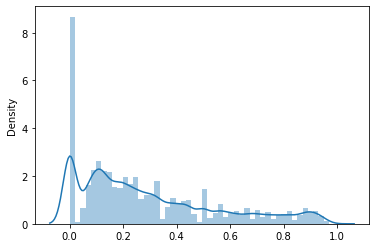

In [ ]:
index_dstn_list = []

for i in range(len(train)):
    for j in range(len(train['index_dstn'][i])):
        index_dstn_list.append(train['index_dstn'][i][j])

sns.distplot(index_dstn_list)

#### 2.3 신문사별 분포 분석

In [ ]:
train['media'].value_counts()
#test['media'].value_counts()

기호일보      7166
국제신문      6678
대전일보      4831
광주일보      4155
남도일보      4148
광주매일신문    3783
대구신문      3750
대구일보      3060
경기일보      2319
당진시대      2014
광양신문       899
Name: media, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'gwangyang')

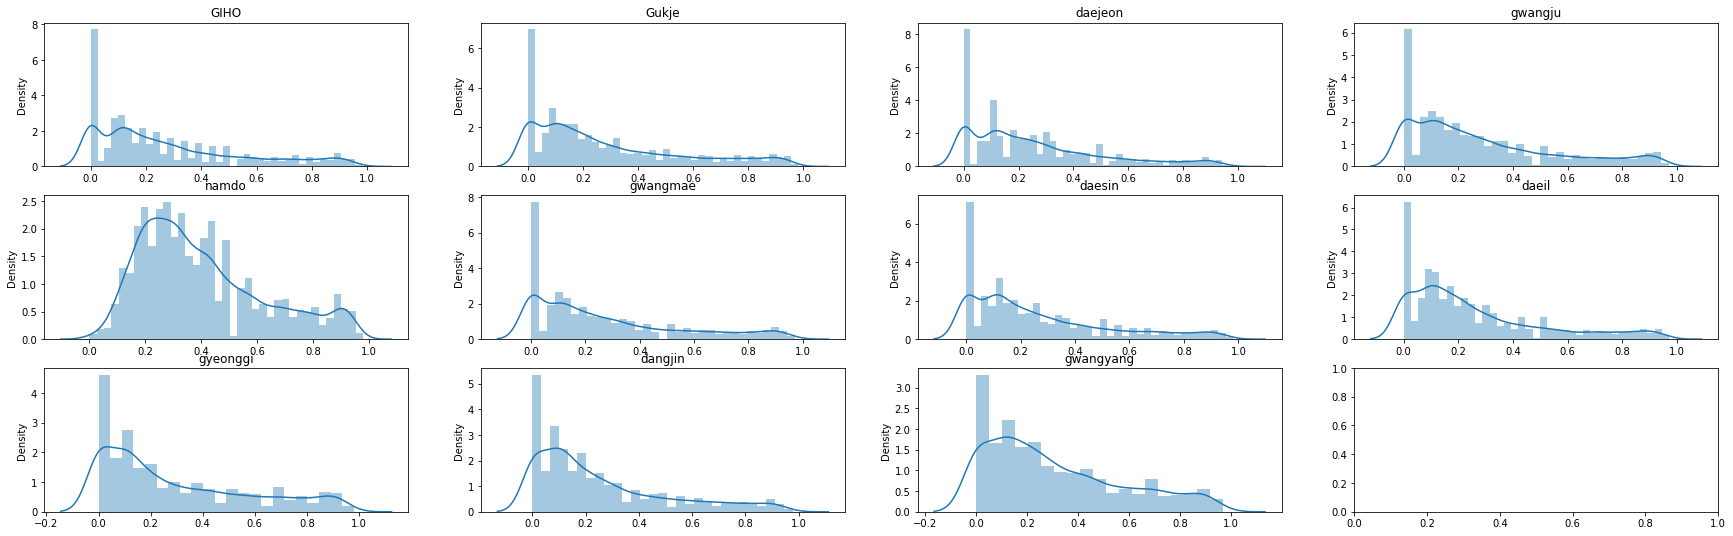

In [ ]:
def newspaper(office):

    newsoffice = train[train['media'] == office]
    newsoffice.reset_index(drop=True, inplace=True)
    
    index_dstn_list = []

    for i in range(len(newsoffice)):
        for j in range(len(newsoffice['index_dstn'][i])):
            index_dstn_list.append(newsoffice['index_dstn'][i][j])

    return index_dstn_list


fig, ax = plt.subplots(ncols=4, nrows=3, figsize = (30,9))
sns.distplot(newspaper('기호일보'), ax = ax[0,0]).set_title('GIHO')
sns.distplot(newspaper('국제신문'), ax = ax[0,1]).set_title('Gukje')
sns.distplot(newspaper('대전일보'), ax = ax[0,2]).set_title('daejeon')
sns.distplot(newspaper('광주일보'), ax = ax[0,3]).set_title('gwangju')
sns.distplot(newspaper('남도일보'), ax = ax[1,0]).set_title('namdo')
sns.distplot(newspaper('광주매일신문'), ax = ax[1,1]).set_title('gwangmae')
sns.distplot(newspaper('대구신문'), ax = ax[1,2]).set_title('daesin')
sns.distplot(newspaper('대구일보'), ax = ax[1,3]).set_title('daeil')
sns.distplot(newspaper('경기일보'), ax = ax[2,0]).set_title('gyeonggi')
sns.distplot(newspaper('당진시대'), ax = ax[2,1]).set_title('dangjin')
sns.distplot(newspaper('광양신문'), ax = ax[2,2]).set_title('gwangyang')

- 다른 신문사는 초반에 몰려있는데 남도일보만 조금 다른 분포?

## 3. TextRank

In [ ]:
sents = test['article_original'][0]
sents

['▲ 석문간척지 임차법인협의회가 한국농어촌공사 당진지사 앞에 공공비축벼 320t을 쌓아두고 시위를 벌이고 있다.',
 '석문간척지 임차법인협의회(이하 간척지협의회)가 농림축산식품부의 부당한 간척지 임대료 책정에 반발하며 지난달 30일 한국농어촌공사 당진지사 앞에 공공비축벼 320t을 쌓고 시위를 벌였다.',
 '43개 영농조합법인이 소속된 간척지협의회는 이번 벼 야적 시위를 통해 현재 1kg당 2100원으로 책정된 임대료를 현재 쌀 판매가격인 1300원대로 인하할 것을 요구하고 있다.',
 '이들은 지난 12월 7일 농림축산식품부에 탄원서를 제출했지만 “임대료 인하는 올해 이후에나 가능하다”고 통보받은 상황이다.',
 '게다가 임차법인들의 계약기간이 올해 만료되기 때문에 임대료를 인하해도 지난 2년 동안의 손실 보상은 받을 수 없는 상황이다.',
 '이에 간척지협의회는 계약기간을 2년 연장하고, 연장된 기간 동안 인하된 임대료를 적용해 지난 2년 간의 손실에 대해 보상할 것을 제안했다.',
 '더불어 요구사항이 받아들여지지 않을 경우 벼 야적시위를 시작한 날짜인 지난해 12월 30일자로 임대료를 벼로 납부하겠다는 입장이다.',
 '김재용 봉치영농조합법인 조합원은 “현재 한국농어촌공사의 답변을 기다리고 있다”며 “상황을 지켜본 뒤 추가적인 야적 시위 여부를 결정할 계획”이라고 말했다.',
 '이어 “법을 만들고 집행할 때 현실성 있게 만들어야 한다”며 “농민이 정부를 믿을 수 있도록 조속히 해결책을 마련해주길 바란다”고 덧붙였다.']

#### 3.1 단어 뽑아서 열 생성

In [ ]:
test['token_pos'] = ''

mecab = Mecab()

def mecab_tokenize(sent):
    words = mecab.pos(sent, join=True)
    words = [w for w in words if ('NN' in w or 'XR' in w or 'VA' in w or 'VV' in w)]
    return words

for i in range(len(test)):
    test['token_pos'][i] = []
    for j in range(len(test['article_original'][i])):
        test['token_pos'][i].append(mecab_tokenize(test['article_original'][i][j]))
        
test['token_pos'][0]

[['석문/NNG',
  '간척지/NNG',
  '임차/NNG',
  '법인/NNG',
  '협의회/NNG',
  '한국/NNP',
  '농어촌/NNG',
  '공사/NNG',
  '당진/NNP',
  '지사/NNG',
  '앞/NNG',
  '공공/NNG',
  '비축/NNG',
  '벼/NNG',
  '쌓/VV',
  '시위/NNG',
  '벌이/VV'],
 ['석문/NNG',
  '간척지/NNG',
  '임차/NNG',
  '법인/NNG',
  '협의회/NNG',
  '이하/NNG',
  '간척지/NNG',
  '협의회/NNG',
  '농림/NNG',
  '축산/NNG',
  '식품/NNG',
  '부/NNG',
  '부당/NNG',
  '간척지/NNG',
  '임대료/NNG',
  '책정/NNG',
  '반발/NNG',
  '지난달/NNG',
  '일/NNBC',
  '한국/NNP',
  '농어촌/NNG',
  '공사/NNG',
  '당진/NNP',
  '지사/NNG',
  '앞/NNG',
  '공공/NNG',
  '비축/NNG',
  '벼/NNG',
  '쌓/VV',
  '시위/NNG',
  '벌였/VV+EP'],
 ['개/NNBC',
  '영농/NNG',
  '조합/NNG',
  '법인/NNG',
  '소속/NNG',
  '간척지/NNG',
  '협의회/NNG',
  '이번/NNG',
  '벼/NNG',
  '야적/NNG',
  '시위/NNG',
  '통해/VV+EC',
  '원/NNBC',
  '책정/NNG',
  '임대료/NNG',
  '쌀/NNG',
  '판매/NNG',
  '가격/NNG',
  '원대/NNG',
  '인하/NNG',
  '것/NNB',
  '요구/NNG'],
 ['지난/VV+ETM',
  '월/NNBC',
  '일/NNBC',
  '농림/NNG',
  '축산/NNG',
  '식품/NNG',
  '부/NNG',
  '탄원서/NNG',
  '제출/NNG',
  '임대료/NNG',
  '인하/VV',
  '올해/NNG',
  '이후

In [ ]:
def pos_to_string(list_):
    
    i_list=[]
    
    for i in range(len(list_)):
        
        j_str = ''
        
        for j in range(len(list_[i])):
            
            j_str = j_str + str(list_[i][j]) + ' '
        
        i_list.append(j_str)
    
    return i_list

In [ ]:
test['token_str'] = test['token_pos'].map(pos_to_string)
test['token_str'][0]

['석문/NNG 간척지/NNG 임차/NNG 법인/NNG 협의회/NNG 한국/NNP 농어촌/NNG 공사/NNG 당진/NNP 지사/NNG 앞/NNG 공공/NNG 비축/NNG 벼/NNG 쌓/VV 시위/NNG 벌이/VV ',
 '석문/NNG 간척지/NNG 임차/NNG 법인/NNG 협의회/NNG 이하/NNG 간척지/NNG 협의회/NNG 농림/NNG 축산/NNG 식품/NNG 부/NNG 부당/NNG 간척지/NNG 임대료/NNG 책정/NNG 반발/NNG 지난달/NNG 일/NNBC 한국/NNP 농어촌/NNG 공사/NNG 당진/NNP 지사/NNG 앞/NNG 공공/NNG 비축/NNG 벼/NNG 쌓/VV 시위/NNG 벌였/VV+EP ',
 '개/NNBC 영농/NNG 조합/NNG 법인/NNG 소속/NNG 간척지/NNG 협의회/NNG 이번/NNG 벼/NNG 야적/NNG 시위/NNG 통해/VV+EC 원/NNBC 책정/NNG 임대료/NNG 쌀/NNG 판매/NNG 가격/NNG 원대/NNG 인하/NNG 것/NNB 요구/NNG ',
 '지난/VV+ETM 월/NNBC 일/NNBC 농림/NNG 축산/NNG 식품/NNG 부/NNG 탄원서/NNG 제출/NNG 임대료/NNG 인하/VV 올해/NNG 이후/NNG 가능/NNG 통보/NNG 받/VV 상황/NNG ',
 '임차/NNG 법인/NNG 계약/NNG 기간/NNG 올해/NNG 만료/NNG 때문/NNB 임대료/NNG 인하/NNG 지난/VV+ETM 년/NNBC 동안/NNG 손실/NNG 보상/NNG 받/VV 수/NNB 없/VA 상황/NNG ',
 '간척지/NNG 협의회/NNG 계약/NNG 기간/NNG 년/NNBC 연장/NNG 연장/NNG 기간/NNG 동안/NNG 인하/NNG 임대료/NNG 적용/NNG 지난/VV+ETM 년/NNBC 간/NNG 손실/NNG 대해/VV+EC 보상/NNG 것/NNB 제안/NNG ',
 '더불/VV 요구사항/NNP 받아들여/VV+EC 경우/NNG 벼/NNG 야적/NNG 시위/NNG 시작/NNG 날짜/NNG 지난해/NNG 월/NNBC 

In [ ]:
test.head()

,media,id,article_original,token_pos,token_str
0,당진시대,500733466,[▲ 석문간척지 임차법인협의회가 한국농어촌공사 당진지사 앞에 공공비축벼 320t을 ...,"[[석문/NNG, 간척지/NNG, 임차/NNG, 법인/NNG, 협의회/NNG, 한국...",[석문/NNG 간척지/NNG 임차/NNG 법인/NNG 협의회/NNG 한국/NNP 농...
1,당진시대,500742482,"[신 벌떼해장국이 손님들의 성원에 보답하고자 24시간 영업을 재개한다., 또한 이와...","[[벌/NNG, 떼/NNG, 해장국/NNG, 손님/NNG, 성원/NNG, 보답/NN...",[벌/NNG 떼/NNG 해장국/NNG 손님/NNG 성원/NNG 보답/NNG 시간/N...
2,당진시대,500742484,"[1년 전과 비교해 당진지역 휘발유 가격은 72원, 경유 가격은 103원 상승했다....","[[년/NNBC, 전/NNG, 비교/NNG, 당진/NNP, 지역/NNG, 휘발유/N...",[년/NNBC 전/NNG 비교/NNG 당진/NNP 지역/NNG 휘발유/NNG 가격/...
3,당진시대,504213810,[어기구 국회의원이 천연가스의 안정적 수급을 위해 2020년 착공이 예정돼 있는 액...,"[[어기구/NNP, 국회의원/NNG, 천연가스/NNG, 안정/NNG, 수급/NNG,...",[어기구/NNP 국회의원/NNG 천연가스/NNG 안정/NNG 수급/NNG 위해/VV...
4,당진시대,505279620,"[당진시정책자문위원회가 유명무실하다는 비판이 지속적으로 제기되고 있다., 민선6기가...","[[당진시/NNP, 정책/NNG, 자문/NNG, 위원회/NNG, 유명무실/NNG, ...",[당진시/NNP 정책/NNG 자문/NNG 위원회/NNG 유명무실/NNG 비판/NNG...


#### 3.2 핵심 단어 확인

In [ ]:
from textrank import KeywordSummarizer

keyword_extractor = KeywordSummarizer(
    tokenize = mecab_tokenize,
    window = -1,
    verbose = False
)

keywords = keyword_extractor.summarize(sents, topk=30)
for word, rank in keywords:
    print('{} ({:.3})'.format(word, rank))

간척지/NNG (2.53)
협의회/NNG (2.03)
임대료/NNG (1.88)
법인/NNG (1.69)
시위/NNG (1.45)
임차/NNG (1.28)
벼/NNG (1.28)
기간/NNG (1.15)
년/NNBC (1.15)
공사/NNG (1.13)
농어촌/NNG (1.13)
한국/NNP (1.13)
인하/NNG (1.05)
지난/VV+ETM (1.04)
쌓/VV (0.949)
석문/NNG (0.949)
당진/NNP (0.949)
지사/NNG (0.949)
앞/NNG (0.949)
공공/NNG (0.949)
비축/NNG (0.949)
책정/NNG (0.886)
농림/NNG (0.879)
축산/NNG (0.879)
식품/NNG (0.879)
부/NNG (0.879)
일/NNBC (0.879)
상황/NNG (0.877)
연장/NNG (0.815)
계약/NNG (0.809)


#### 3.3 핵심문장 뽑기

In [ ]:
summarizer = KeysentenceSummarizer(
    tokenize = mecab_tokenize,
    min_sim = 0.5,
    )

In [ ]:
# bias 설정 ( len(sents) = len(texts) )

bias = np.ones(len(sents))
bias[0] = 7
bias[1] = 5
bias[2] = 4
bias[3] = 3
bias

array([7., 5., 4., 3., 1., 1., 1., 1., 1.])

In [ ]:
# sents 넣은 ver
# non namdo
def ext_keysentences_sents(sents, texts):
    
    ext_keysent = ''
    
    bias = np.ones(len(sents))
    bias[0] = 7
    bias[1] = 5
    bias[2] = 4
    bias[3] = 3

    keysents = summarizer.summarize(sents, bias=bias) 
    
    for idx, rank, mecab_sent in keysents:
        ext_keysent = ext_keysent + str(texts[idx]) + '\n'
    
    return ext_keysent

In [ ]:
# sents 넣은 ver
# for namdo

def ext_keysentences_sents_namdo(sents, texts):
    
    ext_keysent = ''

    keysents = summarizer.summarize(sents, bias=None) 
    
    for idx, rank, mecab_sent in keysents:
        ext_keysent = ext_keysent + str(texts[idx]) + '\n'
    
    return ext_keysent

In [ ]:
# texts 넣은 ver
# non_namdo

def ext_keysentences_texts(sents, texts):
    
    ext_keysent = ''
    
    bias = np.ones(len(texts))
    bias[0] = 7
    bias[1] = 5
    bias[2] = 4
    bias[3] = 3
    
    keysents = summarizer.summarize(texts, bias=bias) 
    
    for idx, rank, mecab_sent in keysents:
        ext_keysent = ext_keysent + str(texts[idx]) + '\n'
    
    return ext_keysent

In [ ]:
# for namdo
def ext_keysentences_texts_namdo(sents, texts):
  ext_keysent = ''
    
  keysents = summarizer.summarize(texts, bias = None) 
    
  for idx, rank, mecab_sent in keysents:
      ext_keysent = ext_keysent + str(texts[idx]) + '\n'
    
  return ext_keysent

In [ ]:
test['ext_keysent_sent']=''
test['ext_keysent_text']=''

for i in range(len(test)):
  if test['media'][i] != '남도일보':
    test['ext_keysent_sent'][i] = ext_keysentences_sents(test['token_str'][i],test['article_original'][i])
    test['ext_keysent_text'][i] = ext_keysentences_texts(test['token_str'][i],test['article_original'][i])

  else:
    test['ext_keysent_sent'][i] = ext_keysentences_sents_namdo(test['token_str'][i],test['article_original'][i])
    test['ext_keysent_text'][i] = ext_keysentences_texts_namdo(test['token_str'][i],test['article_original'][i])

## 4. 제출 데이터 만들기

In [ ]:
test['ext_keysent_sent_list']=''
test['ext_keysent_text_list']=''

for i in range(len(test)):
    test['ext_keysent_sent_list'][i] = str(test['ext_keysent_sent'][i]).split('\n')[:3]
    test['ext_keysent_text_list'][i] = str(test['ext_keysent_text'][i]).split('\n')[:3]

In [ ]:
type(test['ext_keysent_text_list'][1])

list

In [ ]:
for i in range(len(test)):
    test['ext_keysent_sent_list'][i] = test['ext_keysent_sent_list'][i][0] + "\n" + test['ext_keysent_sent_list'][i][1] + "\n" + test['ext_keysent_sent_list'][i][2]
    test['ext_keysent_text_list'][i] = test['ext_keysent_text_list'][i][0] + "\n" + test['ext_keysent_text_list'][i][1] + "\n" + test['ext_keysent_text_list'][i][2]

In [ ]:
test['ext_keysent_sent_list'][1]

'이 기간 동안 야간(저녁 11시~오전 7시)에 찾는 손님들을 위해 뼈해장국은 2000원, 감자탕은 5000원 할인된 가격으로 제공한다.\n또한 벌떼해장국의 추천 메뉴는 콩나물황태해장국이다.\n또한 육수는 초벌로 삶은 뼈를 한 번 더 4시간 동안 푹 고아낸 것을 사용해 깊고 진한 맛이 특징이다.'

#### 제출 파일 생성

In [ ]:
sub_data_sent = test[['id','ext_keysent_sent_list']]
sub_data_text = test[['id','ext_keysent_text_list']]

In [ ]:
sub_data_sent.rename(columns={'ext_keysent_sent_list': 'summary'}, inplace=True)
sub_data_text.rename(columns={'ext_keysent_text_list': 'summary'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
sub_data_sent.head()

,id,summary
0,500733466,석문간척지 임차법인협의회(이하 간척지협의회)가 농림축산식품부의 부당한 간척지 임대료...
1,500742482,이 기간 동안 야간(저녁 11시~오전 7시)에 찾는 손님들을 위해 뼈해장국은 200...
2,500742484,한국석유공사가 운영하는 오피넷(www.opinet.co.kr)에 따르면 최근 송악읍...
3,504213810,어 의원은 지난 17일 ‘천연가스 장기수급 전망과 수급 안정성 제고를 위한 과제’를...
4,505279620,"그러나 지난해 정책자문위원회 소집횟수는 전체회의 1회에 그치고 있으며, 위원들의 의..."


In [ ]:
sub_data_sent.to_csv('/content/drive/MyDrive/한국어 추출요약/TextRank_sent_2.csv', encoding='utf-8-sig', index=False)
sub_data_text.to_csv('/content/drive/MyDrive/한국어 추출요약/TextRank_text_2.csv', encoding='utf-8-sig', index=False)

In [ ]:
sub_data_sent

,id,summary
0,500733466,석문간척지 임차법인협의회(이하 간척지협의회)가 농림축산식품부의 부당한 간척지 임대료...
1,500742482,이 기간 동안 야간(저녁 11시~오전 7시)에 찾는 손님들을 위해 뼈해장국은 200...
2,500742484,한국석유공사가 운영하는 오피넷(www.opinet.co.kr)에 따르면 최근 송악읍...
3,504213810,어 의원은 지난 17일 ‘천연가스 장기수급 전망과 수급 안정성 제고를 위한 과제’를...
4,505279620,"그러나 지난해 정책자문위원회 소집횟수는 전체회의 1회에 그치고 있으며, 위원들의 의..."
...,...,...
9982,745338220,당초 시는 도시재생 중구 내항 1부두 일대가 국가시범지구로 선정되면 국비 250억 ...
9983,745367988,청와대는 30일 문재인 대통령의 ‘1호 공약’인 고위공직자범죄수사처(공수처) 설치법...
9984,745368130,광주지역 광공업 생산 감소율이 14개월 만에 최고를 기록했다.\n광주 감소율은 지난...
9985,745368136,아름다운 가게 용봉점 헌책방이 개점 10년만에 문을 닫는 다.\n안상열 본부장은 “...


In [ ]:
test.head()

,media,id,article_original,token_pos,token_str,ext_keysent_sent,ext_keysent_text,ext_keysent_sent_list,ext_keysent_text_list
0,당진시대,500733466,[▲ 석문간척지 임차법인협의회가 한국농어촌공사 당진지사 앞에 공공비축벼 320t을 ...,"[[석문/NNG, 간척지/NNG, 임차/NNG, 법인/NNG, 협의회/NNG, 한국...",[석문/NNG 간척지/NNG 임차/NNG 법인/NNG 협의회/NNG 한국/NNP 농...,석문간척지 임차법인협의회(이하 간척지협의회)가 농림축산식품부의 부당한 간척지 임대료...,석문간척지 임차법인협의회(이하 간척지협의회)가 농림축산식품부의 부당한 간척지 임대료...,석문간척지 임차법인협의회(이하 간척지협의회)가 농림축산식품부의 부당한 간척지 임대료...,석문간척지 임차법인협의회(이하 간척지협의회)가 농림축산식품부의 부당한 간척지 임대료...
1,당진시대,500742482,"[신 벌떼해장국이 손님들의 성원에 보답하고자 24시간 영업을 재개한다., 또한 이와...","[[벌/NNG, 떼/NNG, 해장국/NNG, 손님/NNG, 성원/NNG, 보답/NN...",[벌/NNG 떼/NNG 해장국/NNG 손님/NNG 성원/NNG 보답/NNG 시간/N...,이 기간 동안 야간(저녁 11시~오전 7시)에 찾는 손님들을 위해 뼈해장국은 200...,신 벌떼해장국이 손님들의 성원에 보답하고자 24시간 영업을 재개한다.\n남기순 대표...,이 기간 동안 야간(저녁 11시~오전 7시)에 찾는 손님들을 위해 뼈해장국은 200...,신 벌떼해장국이 손님들의 성원에 보답하고자 24시간 영업을 재개한다.\n남기순 대표...
2,당진시대,500742484,"[1년 전과 비교해 당진지역 휘발유 가격은 72원, 경유 가격은 103원 상승했다....","[[년/NNBC, 전/NNG, 비교/NNG, 당진/NNP, 지역/NNG, 휘발유/N...",[년/NNBC 전/NNG 비교/NNG 당진/NNP 지역/NNG 휘발유/NNG 가격/...,한국석유공사가 운영하는 오피넷(www.opinet.co.kr)에 따르면 최근 송악읍...,한국석유공사가 운영하는 오피넷(www.opinet.co.kr)에 따르면 최근 송악읍...,한국석유공사가 운영하는 오피넷(www.opinet.co.kr)에 따르면 최근 송악읍...,한국석유공사가 운영하는 오피넷(www.opinet.co.kr)에 따르면 최근 송악읍...
3,당진시대,504213810,[어기구 국회의원이 천연가스의 안정적 수급을 위해 2020년 착공이 예정돼 있는 액...,"[[어기구/NNP, 국회의원/NNG, 천연가스/NNG, 안정/NNG, 수급/NNG,...",[어기구/NNP 국회의원/NNG 천연가스/NNG 안정/NNG 수급/NNG 위해/VV...,어 의원은 지난 17일 ‘천연가스 장기수급 전망과 수급 안정성 제고를 위한 과제’를...,어기구 국회의원이 천연가스의 안정적 수급을 위해 2020년 착공이 예정돼 있는 액화...,어 의원은 지난 17일 ‘천연가스 장기수급 전망과 수급 안정성 제고를 위한 과제’를...,어기구 국회의원이 천연가스의 안정적 수급을 위해 2020년 착공이 예정돼 있는 액화...
4,당진시대,505279620,"[당진시정책자문위원회가 유명무실하다는 비판이 지속적으로 제기되고 있다., 민선6기가...","[[당진시/NNP, 정책/NNG, 자문/NNG, 위원회/NNG, 유명무실/NNG, ...",[당진시/NNP 정책/NNG 자문/NNG 위원회/NNG 유명무실/NNG 비판/NNG...,"그러나 지난해 정책자문위원회 소집횟수는 전체회의 1회에 그치고 있으며, 위원들의 의...","그러나 지난해 정책자문위원회 소집횟수는 전체회의 1회에 그치고 있으며, 위원들의 의...","그러나 지난해 정책자문위원회 소집횟수는 전체회의 1회에 그치고 있으며, 위원들의 의...","그러나 지난해 정책자문위원회 소집횟수는 전체회의 1회에 그치고 있으며, 위원들의 의..."
